#### SIDDHANT MITTAL
#### 1910110388
#### CSD 350 PROJECT
#### PLAGIARISM CHECKER

In [1]:
#Importing all the required libraries and packages
import os
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from queue import PriorityQueue
import re
import matplotlib.pyplot as plotGraph

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#PLEASE SEE BEFORE PROCEEDING FURTHER:
#Upload all the text files on the colab before proceeding further
#The text files are attached/uploaded in the main folder along with other files
#There are total 8 text files which compute to the database that are to be uploaded.
#If shows error in uploading please referesh the colab session and try again

In [3]:
#Opens the file and replaces the new line and special character to space and tokenizes the data.
def openFile(filename):
        f=open(filename,"r")
        orig=f.read().replace("\n"," ")
        orig = re.sub(r'[^\w\s]', '', orig)
        orig = re.sub(r'[0-9]+', '', orig)
        return word_tokenize(orig)

In [4]:
#Converts the token into lower case, removes punctuation and stopwords using NLTK package
def clean(init_token):
        #lowercase
        tokens_o = [token.lower() for token in init_token]
        #stop word removal
        stop_words=set(stopwords.words('english'))
        #punctuation removal
        punctuations=['"','.','(',')',',','?',';',':',"''",'``']
        filtered_tokens = [w for w in tokens_o if not w in stop_words and not w in punctuations]
        return filtered_tokens

In [5]:
#Takes the filtered tokens and make trigrams of continuous words
def makeTrig(clean_token):
        trigrams=[]
        for i in range(len(clean_token)-2):
            t=(clean_token[i],clean_token[i+1],clean_token[i+2])
            trigrams.append(t)
        return trigrams

In [6]:
#Calls the above functions to pre-process the data and finally returns the list of trigrams for the particular document.
def Preprocess(filename):
       trig = []
       init_token = openFile(filename)
       clean_token = clean(init_token)
       trig_list = makeTrig(clean_token)
       trig = trig_list
       return trig  

In [7]:
#Pre-process the corpus taking all .txt files in directory and calls the PreProcess() function for each of them.
docList = {}

def preProcessData():
  
    files = [doc for doc in os.listdir() if (doc.endswith(
        '.txt') and (doc != 'DataStore.txt' and doc != 'temp.txt'))]
    for doc in files:
        tempTrig = []
        tempTrig = Preprocess(doc)
        docList[doc] = tempTrig

In [8]:
#Stores the pre-processed corpus in a text file to avoid the computational load of pre-processing every time and loads the pre-processed data.

def storeCorpusData():
    trg = open('DataStore.txt', "w")
    trg.write(str(docList))
    trg.close()

def loadCorpusData():
    temp = open('DataStore.txt', 'r')
    s = temp.read()
    temp.close()
    docList = eval(s)
    print('a', docList)

In [9]:
#Calls the pre-processing functions
def PP():
    preProcessData()
    storeCorpusData()

In [10]:
"""Calculate similarity between all the documents present in the dataset with the document to check, rank will contain number 
of trigrams matches per unit length for a given document. Document with higher priority (in the front) will have more 
similarity with the document being checked than a document with lower priority."""
def CalculateRank(corpus,inp):
        rank = PriorityQueue()
        for doc in corpus:    
            s = 0
            corp = corpus[doc]
            for tri in inp:
                if tri in corp:
                    s+=1
            rank.put((s/len(inp)*100,doc))
        return rank   

In [12]:
#Taking input from user

#Enter file name (without .txt)
r = input("Enter file name: ")

#Enter the paragraph for the document to be checked(enter a sentence not single word or 2/3 words)
t = input("Enter text: ")

Enter file name: test
Enter text: As most of the world is online, the task of making data accessible and available to all is a challenge.Inheritance in object oriented programming is where a new class is formed using classes which have allready been defined. These classes have have some of the behavior and attributes which where existent in the classes that it inherited from. The peropos of inheritance in object oriented programming is to minimize the reuse of existing code without modification.  Inheritance allowes classes to be categorized, similer to the way humans catagorize.Natural  Language Generation  (NLG)  is  the  process  of  producing  phrases, sentences  and paragraphs  that are  meaningful  from  an  internal  representation.Which can be broadly categorized into two levels Higher Level  which  include  speech  recognition  and  Lower Level which corresponds to  natural language.


In [13]:
#Gets the data from input boxes and pre-processes it adds the file to the corpus and finally graphs the plagiarism percentage in form of bar graph
def graphExecution():
    s = t
    d = r+'.txt'
    f = open(d, "w")
    f.write(s)
    f.close()
    inp = Preprocess(d)
    X = []
    Y = []
    doc_rank = CalculateRank(docList, inp)
    for i in range(len(docList)):
        item = doc_rank.get()
        Y.append(item[0])
        X.append(item[1])

    plotGraph.bar(X, Y, width=0.5, align='center')
    plotGraph.xlabel("Doc Name")
    plotGraph.ylabel("% Similarity")
    plotGraph.title("Similarity Analaysis")
    plotGraph.xticks(rotation=90)
    plotGraph.tight_layout()
    plotGraph.show()

In [14]:
#Call the PP() function to start pre-processing
PP()

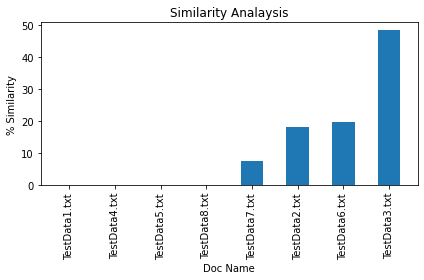

In [15]:
#After pre-processing is done call the graphExecution function to calculate similarties and rank to show the graph
graphExecution()